In [57]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.quantum_info.operators import Operator

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

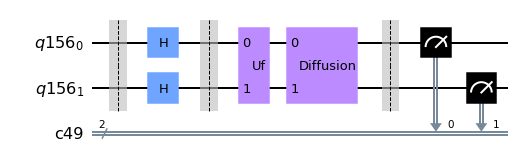

In [95]:
# Creating registers
qr=QuantumRegister(2)
cr=ClassicalRegister(2)  # classical registers for recording the measurement on qr

groverCircuit=QuantumCircuit(qr, cr)
barriers=True

if barriers:
    groverCircuit.barrier()

# Apply Hadamard gates before querying the oracle
groverCircuit.h(qr[0])
groverCircuit.h(qr[1])

if barriers:
    groverCircuit.barrier()

uf=Operator([  # Apply quantum oracle (10)
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

'''
N=4
D=Operator([  # Diffusion operator
    [(2/N)-1, 2/N, 2/N, 2/N],
    [2/N, (2/N)-1, 2/N, 2/N],
    [2/N, 2/N, (2/N)-1, 2/N],
    [2/N, 2/N, 2/N, (2/N)-1],
])
'''
D=Operator([  # Diffusion operator
    [-1/2, 1/2, 1/2, 1/2],
    [1/2, -1/2, 1/2, 1/2],
    [1/2, 1/2, -1/2, 1/2],
    [1/2, 1/2, 1/2, -1/2],
])

groverCircuit.unitary(uf, [qr[0], qr[1]], label='Uf')
groverCircuit.unitary(D, [qr[0], qr[1]], label='Diffusion')

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr[0], cr[0])
groverCircuit.measure(qr[1], cr[1])

groverCircuit.draw(output='mpl')

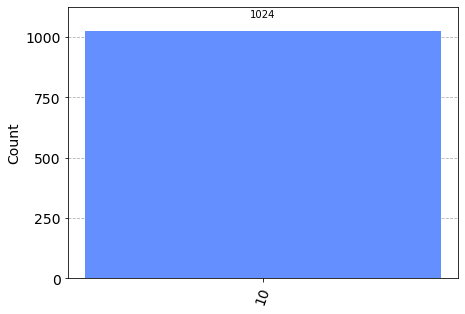

In [97]:
backend=BasicAer.get_backend('qasm_simulator')
shots=1024
result=execute(groverCircuit, backend=backend, shots=shots).result()
counts=result.get_counts()
plot_histogram(counts)

In [67]:
def inversion_about_average(circuit, register):
    circuit.h(register)
    circuit.x(register)
    circuit.h(register[1])
    circuit.cx(register[0], register[1])
    circuit.h(register[1])
    circuit.x(register)
    circuit.h(register)

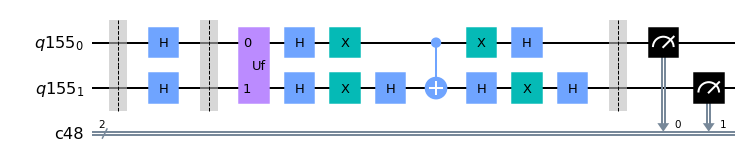

In [94]:
# Creating registers
qr=QuantumRegister(2)
cr=ClassicalRegister(2)  # classical registers for recording the measurement on qr

groverCircuit=QuantumCircuit(qr, cr)
barriers=True

if barriers:
    groverCircuit.barrier()

# Apply Hadamard gates before querying the oracle
groverCircuit.h(qr[0])
groverCircuit.h(qr[1])

if barriers:
    groverCircuit.barrier()

uf=Operator([  # Apply quantum oracle (10)
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

groverCircuit.unitary(uf, [qr[0], qr[1]], label='Uf')
inversion_about_average(groverCircuit, qr)

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr[0], cr[0])
groverCircuit.measure(qr[1], cr[1])

groverCircuit.draw(output='mpl')

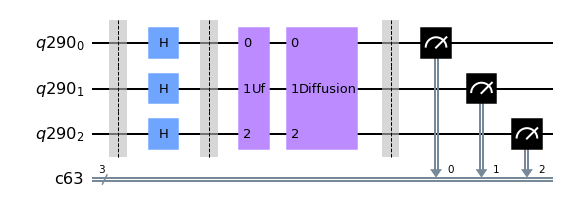

In [139]:
# Creating registers
qr=QuantumRegister(3)
cr=ClassicalRegister(3)  # classical registers for recording the measurement on qr

groverCircuit=QuantumCircuit(qr, cr)
barriers=True

if barriers:
    groverCircuit.barrier()

# Apply Hadamard gates before querying the oracle
groverCircuit.h(qr[0])
groverCircuit.h(qr[1])
groverCircuit.h(qr[2])

if barriers:
    groverCircuit.barrier()

uf=Operator([  # Apply quantum oracle (search 000, 101)
    [-1, 0, 0, 0, 0, 0, 0, 0],  # 000
    [0, 1, 0, 0, 0, 0, 0, 0],  # 001
    [0, 0, 1, 0, 0, 0, 0, 0],  # 010
    [0, 0, 0, 1, 0, 0, 0, 0],  # 011
    [0, 0, 0, 0, 1, 0, 0, 0],  # 100
    [0, 0, 0, 0, 0, -1, 0, 0],  # 101
    [0, 0, 0, 0, 0, 0, 1, 0],  # 110
    [0, 0, 0, 0, 0, 0, 0, 1],  # 111
])

D=Operator([  # Diffusion operator
    [-3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
    [1/4, -3/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4],
    [1/4, 1/4, -3/4, 1/4, 1/4, 1/4, 1/4, 1/4],
    [1/4, 1/4, 1/4, -3/4, 1/4, 1/4, 1/4, 1/4],
    [1/4, 1/4, 1/4, 1/4, -3/4, 1/4, 1/4, 1/4],
    [1/4, 1/4, 1/4, 1/4, 1/4, -3/4, 1/4, 1/4],
    [1/4, 1/4, 1/4, 1/4, 1/4, 1/4, -3/4, 1/4],
    [1/4, 1/4, 1/4, 1/4, 1/4, 1/4, 1/4, -3/4],
])

# pi/4 sqrt(2^n) where n = 3, run ~ 2.22 times
#groverCircuit.unitary(uf, [qr[0], qr[1], qr[2]], label='Uf')
#groverCircuit.unitary(D, [qr[0], qr[1], qr[2]], label='Diffusion')
#groverCircuit.unitary(uf, [qr[0], qr[1], qr[2]], label='Uf')
#groverCircuit.unitary(D, [qr[0], qr[1], qr[2]], label='Diffusion')

# pi/4 sqrt(2^n/M) where n = 3, M=2, run ~ 1.7 times  กรณีต้องการ search หลายตัว
groverCircuit.unitary(uf, [qr[0], qr[1], qr[2]], label='Uf')
groverCircuit.unitary(D, [qr[0], qr[1], qr[2]], label='Diffusion')

if barriers:
    groverCircuit.barrier()

groverCircuit.measure(qr[0], cr[0])
groverCircuit.measure(qr[1], cr[1])
groverCircuit.measure(qr[2], cr[2])

groverCircuit.draw(output='mpl')

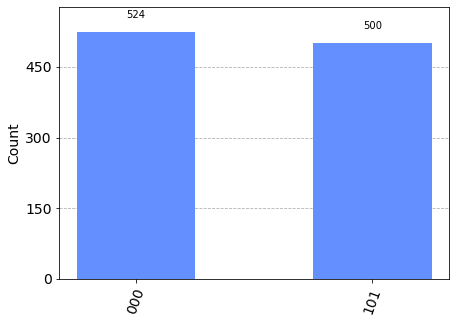

In [140]:
backend=BasicAer.get_backend('qasm_simulator')
shots=1024
result=execute(groverCircuit, backend=backend, shots=shots).result()
counts=result.get_counts()
plot_histogram(counts)